## Evaluation Metrics for Classification
##### In the previous session we trained a model for predicting churn. How do we know if it's good?

### Evaluation metrics
##### Metric - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

## Import Dataset

In [3]:
df = pd.read_csv('.\datasets\churn_data.csv')

df.columns = df.columns.str.lower().str.replace(' ','_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)
df.churn = (df.churn == 'yes').astype(int)

df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


In [4]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [5]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = ['gender','seniorcitizen','partner','dependents','phoneservice','multiplelines','internetservice','onlinesecurity',
               'onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies','contract','paperlessbilling','paymentmethod']

In [6]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:,1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

## Accuracy and dummy model
- Evaluate the model on different thresholds
- Check the accuracy of dummy baselines

In [8]:
# validation dataset
len(y_val)

1409

In [9]:
(y_val == churn_decision).sum()

1132

In [10]:
(y_val == churn_decision).sum() / len(y_val) 

0.8034066713981547

In [11]:
# calculating the mean yeilds the same thing
(y_val == churn_decision).mean()

0.8034066713981547

In [12]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


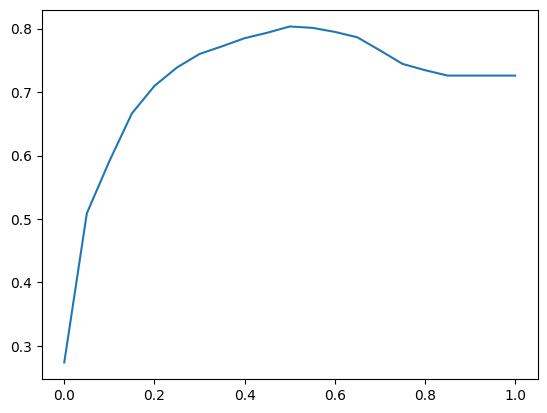

In [13]:
plt.plot(thresholds, scores)

In [14]:
# alternatively to get the accuracy store you can use  sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

In [15]:
accuracy = accuracy_score(y_val, y_pred >= 0.5)

In [16]:
thresholds = np.linspace(0,1,21)
scores = []
for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [89]:
y_pred >= 1.0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [90]:
from collections import Counter
Counter(y_pred >= 1.0)

Counter({False: 563})

In [91]:
1 - y_val.mean()

0.7495559502664298

## Confusion table
- Different types of errors and correct decisions
- Arranging them in a table

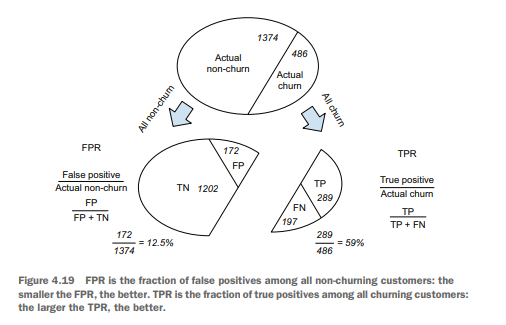

In [19]:
actual_positive = (y_val == 1) # people who actually churn
actual_negative = (y_val == 0) # people who are not going to churn

In [20]:
t = 0.5 #threshold
predict_positive = (y_pred >= t) # above threshold 
predict_negative = (y_pred < t) # below threshold 

In [21]:
tp = (predict_positive & actual_positive).sum() # true positive
tn = (predict_negative & actual_negative).sum() # true negative
fp = (predict_positive & actual_negative).sum() # we predict positive but it turns out to be negative
fn = (predict_negative & actual_positive).sum() # we predict negative but it turns out to be positive

In [22]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[922, 101],
       [176, 210]])

In [23]:
# convert to percentages
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

## Precision and Recall

In [24]:
(tp + tn) / (tp + tn + fp + fn)

0.8034066713981547

#### Precision tell us fraction of positive predictions turned out to be correct

In [25]:
# precision = TP / number of Positives
precision = tp / (tp + fp)
precision

0.6752411575562701

#### Recall is the fraction of churning users that we identify correctly

In [26]:
# recall = tp / number of positive observations
recall = tp / (tp + fn)
recall

0.5440414507772021

In [27]:
# percentage of people who are churning but failed to identify them
1 - recall

0.4559585492227979

In [28]:
# compare this to accuracy
accuracy

0.8034066713981547

In [29]:
# this means that accuracy can be misleading hence the need to create the confusion matrix

## ROC Curves

##### FPR - False Positive Rate = FP / (TN + FP)
##### TPR - True Positive Rate = TP / (FN + TP) 
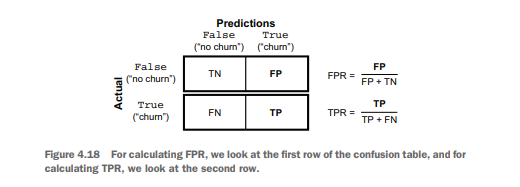

In [30]:
tpr = tp / (tp + fn)
tpr

0.5440414507772021

In [31]:
# this is also the same as recall
tpr == recall

True

In [32]:
fpr = fp / (fp + tn)
fpr

0.09872922776148582

In [92]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred <t)

    tp = (predict_positive & actual_positive).sum() # true positive
    tn = (predict_negative & actual_negative).sum() # true negative
    fp = (predict_positive & actual_negative).sum() # we predict positive but it turns out to be negative
    fn = (predict_negative & actual_positive).sum() # we predict negative but it turns out to be positive

    scores.append((t, tp, fp, fn, tn))

In [93]:
scores

[(0.0, 141, 422, 0, 0),
 (0.01, 140, 366, 1, 56),
 (0.02, 140, 341, 1, 81),
 (0.03, 139, 311, 2, 111),
 (0.04, 137, 289, 4, 133),
 (0.05, 136, 276, 5, 146),
 (0.06, 136, 265, 5, 157),
 (0.07, 136, 246, 5, 176),
 (0.08, 136, 232, 5, 190),
 (0.09, 136, 225, 5, 197),
 (0.1, 135, 209, 6, 213),
 (0.11, 134, 202, 7, 220),
 (0.12, 134, 191, 7, 231),
 (0.13, 133, 191, 8, 231),
 (0.14, 132, 184, 9, 238),
 (0.15, 131, 180, 10, 242),
 (0.16, 129, 173, 12, 249),
 (0.17, 128, 162, 13, 260),
 (0.18, 128, 156, 13, 266),
 (0.19, 125, 153, 16, 269),
 (0.2, 124, 144, 17, 278),
 (0.21, 123, 137, 18, 285),
 (0.22, 123, 132, 18, 290),
 (0.23, 122, 127, 19, 295),
 (0.24, 121, 120, 20, 302),
 (0.25, 121, 113, 20, 309),
 (0.26, 118, 108, 23, 314),
 (0.27, 118, 102, 23, 320),
 (0.28, 116, 99, 25, 323),
 (0.29, 115, 94, 26, 328),
 (0.3, 115, 92, 26, 330),
 (0.31, 115, 91, 26, 331),
 (0.32, 114, 89, 27, 333),
 (0.33, 114, 87, 27, 335),
 (0.34, 112, 84, 29, 338),
 (0.35000000000000003, 109, 78, 32, 344),
 (0.36, 

In [94]:
# create a dataframe from the scores
# provide column names
columns = ['thresholds', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [95]:
df_scores[::10] # look at each tenth record

,thresholds,tp,fp,fn,tn
0,0.0,141,422,0,0
10,0.1,135,209,6,213
20,0.2,124,144,17,278
30,0.3,115,92,26,330
40,0.4,99,69,42,353
50,0.5,82,49,59,373
60,0.6,55,22,86,400
70,0.7,26,4,115,418
80,0.8,3,0,138,422
90,0.9,0,0,141,422


In [96]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [98]:
df_scores[::10] # look at each tenth record

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,141,422,0,0,1.000000,1.000000
10,0.1,135,209,6,213,0.957447,0.495261
20,0.2,124,144,17,278,0.879433,0.341232
30,0.3,115,92,26,330,0.815603,0.218009
40,0.4,99,69,42,353,0.702128,0.163507
50,0.5,82,49,59,373,0.581560,0.116114
60,0.6,55,22,86,400,0.390071,0.052133
70,0.7,26,4,115,418,0.184397,0.009479
80,0.8,3,0,138,422,0.021277,0.000000
90,0.9,0,0,141,422,0.000000,0.000000


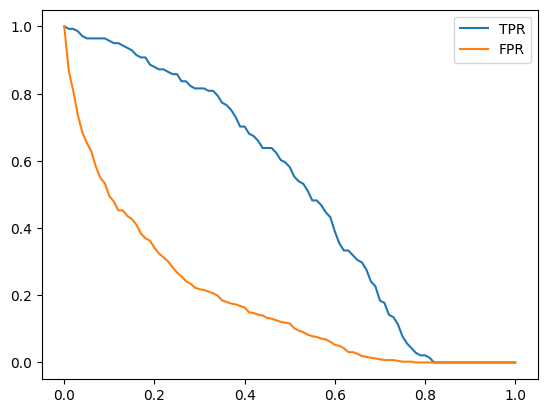

In [99]:
plt.plot(df_scores.thresholds, df_scores['tpr'], label = 'TPR')
plt.plot(df_scores.thresholds, df_scores['fpr'], label = 'FPR')
plt.legend()

## Random model

In [39]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [40]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [41]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)
    
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
    
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred <t)
    
        tp = (predict_positive & actual_positive).sum() # true positive
        tn = (predict_negative & actual_negative).sum() # true negative
        fp = (predict_positive & actual_negative).sum() # we predict positive but it turns out to be negative
        fn = (predict_negative & actual_positive).sum() # we predict negative but it turns out to be positive
    
        scores.append((t, tp, fp, fn, tn))
        
    columns = ['thresholds', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [42]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [43]:
df_rand[::10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


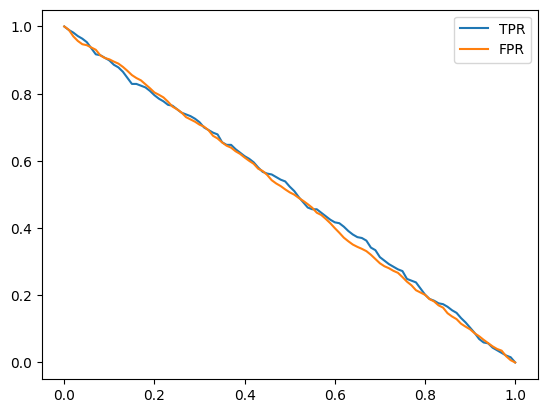

In [44]:
# plot the graph
plt.plot(df_rand.thresholds, df_rand['tpr'], label = 'TPR')
plt.plot(df_rand.thresholds, df_rand['fpr'], label = 'FPR')
plt.legend()

## Ideal model

In [45]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [46]:
y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [47]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [48]:
1 - y_val.mean()

0.7260468417317246

In [49]:
((y_ideal_pred >= 0.726) ==  y_ideal).mean()

1.0

In [50]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


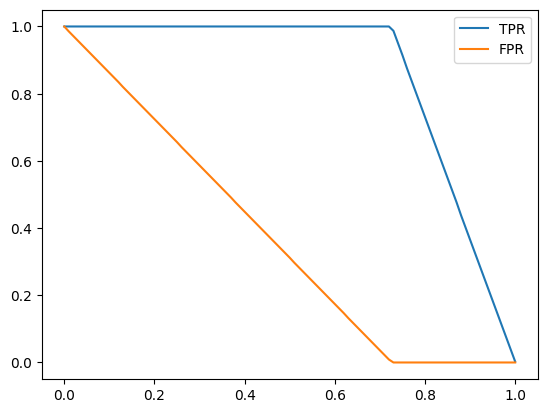

In [51]:
# plot the graph
plt.plot(df_ideal.thresholds, df_ideal['tpr'], label = 'TPR')
plt.plot(df_ideal.thresholds, df_ideal['fpr'], label = 'FPR')
plt.legend()

## Putting everything together

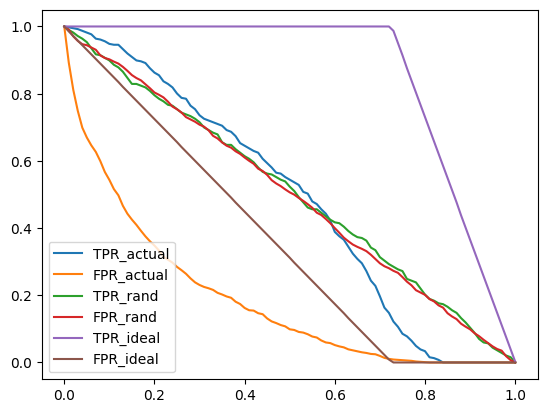

In [52]:
# actual model
plt.plot(df_scores.thresholds, df_scores['tpr'], label = 'TPR_actual')
plt.plot(df_scores.thresholds, df_scores['fpr'], label = 'FPR_actual')

# random model
plt.plot(df_rand.thresholds, df_rand['tpr'], label = 'TPR_rand')
plt.plot(df_rand.thresholds, df_rand['fpr'], label = 'FPR_rand')

# Ideal model
plt.plot(df_ideal.thresholds, df_ideal['tpr'], label = 'TPR_ideal')
plt.plot(df_ideal.thresholds, df_ideal['fpr'], label = 'FPR_ideal')

plt.legend()

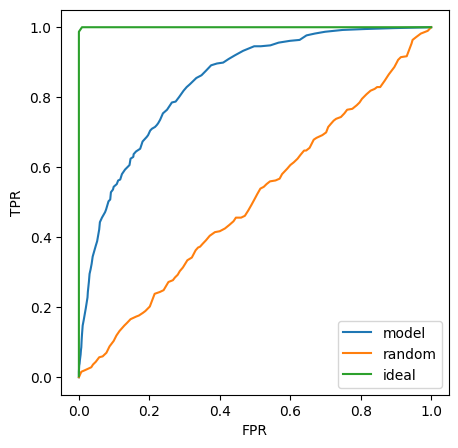

In [53]:
plt.figure(figsize=(5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label = 'model')
plt.plot(df_rand.fpr, df_rand.tpr, label = 'random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label = 'ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

##### models shouls not go below the random baseline
##### ROC Curves help you vizualize the behavior of the model at different thresholds

In [54]:
# using sklearn to dray roc_curve
from sklearn.metrics import roc_curve

In [55]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

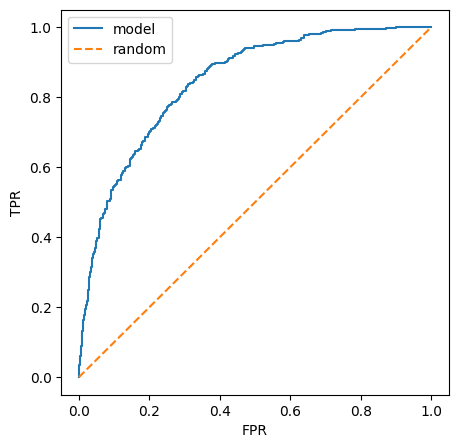

In [56]:
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, label = 'model')
plt.plot([0, 1], [0, 1], label = 'random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

## ROC AUC
- Area Under the ROC curve - useful metric
- Interpretation of AUC

In [57]:
from sklearn.metrics import auc

In [58]:
auc(fpr, tpr)

0.843850505725819

In [59]:
auc(df_scores.fpr, df_scores.tpr)

0.8438732975754537

In [60]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [61]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.843850505725819

In [62]:
from sklearn.metrics import roc_auc_score

In [63]:
roc_auc_score(y_val, y_pred)

0.843850505725819

##### AUC is the probability that the randomly selected positive example has a higher score than a randomly selected negative value
![Alt text](image.png)

In [64]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [65]:
import random

In [66]:
# randomly select a positive example
pos_idx = random.randint(0, len(pos) - 1)

# randomly select a negative example
neg_idx = random.randint(0, len(neg) - 1)

In [67]:
pos[pos_idx] > neg[neg_idx]

True

In [68]:
# repeat this 10000 times
n = 10000
success = 0

for i in range(n):
    pos_idx = random.randint(0, len(pos) - 1)
    neg_idx = random.randint(0, len(neg) - 1)

    if pos[pos_idx] > neg[neg_idx]:
        success = success + 1
    
success / n

0.8443

In [69]:
# implement the above function with numpy

n = 10000
np.random.seed(1)
pos_idx = np.random.randint(0, len(pos), size=n) 
neg_idx = np.random.randint(0, len(neg), size=n)
(pos[pos_idx] > neg[neg_idx]).mean()

0.8412

## Cross Validation
- Evaluating the same model on different subsets of data
- Getting the average prediction and the spread within predictions

##### Parameter tuning is the process of selecting the best parameter

In [70]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer()
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [71]:
dv, model = train(df_train, y_train, C=10)

In [72]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred


In [73]:
predict(df_val, dv, model)

array([0.00968233, 0.18004739, 0.20701962, ..., 0.13557742, 0.79901014,
       0.83292779])

In [74]:
y_pred = predict(df_val, dv, model)

In [75]:
# K-Fold Validation
from sklearn.model_selection import KFold

In [76]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [77]:
kfold.split(df_full_train)

<generator object _BaseKFold.split at 0x0000020C31988660>

In [78]:
next(kfold.split(df_full_train))

(array([   0,    1,    2, ..., 5631, 5632, 5633]),
 array([   4,   21,   28,   33,   44,   58,   67,   72,   79,   81,   82,
          98,  101,  116,  119,  125,  126,  136,  141,  147,  161,  169,
         179,  192,  196,  200,  206,  214,  222,  231,  250,  255,  259,
         276,  280,  285,  301,  308,  313,  314,  325,  343,  354,  359,
         383,  386,  407,  420,  428,  433,  440,  447,  457,  473,  486,
         496,  501,  503,  507,  545,  554,  557,  566,  574,  580,  582,
         592,  605,  608,  623,  634,  636,  645,  662,  667,  684,  687,
         689,  729,  745,  758,  763,  778,  783,  792,  795,  808,  839,
         840,  847,  850,  858,  867,  870,  871,  881,  899,  906,  927,
         929,  931,  940,  943,  976,  984,  987,  988, 1005, 1016, 1028,
        1034, 1038, 1050, 1056, 1074, 1079, 1117, 1122, 1123, 1131, 1134,
        1139, 1144, 1155, 1159, 1163, 1169, 1179, 1198, 1206, 1216, 1238,
        1247, 1256, 1272, 1297, 1298, 1310, 1344, 1356, 1370,

In [79]:
from tqdm.auto import tqdm

In [80]:
n_splits = 5

scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.churn.values
    y_val = df_val.churn.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

0it [00:00, ?it/s]

In [81]:
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.841 +- 0.013


In [82]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [83]:
len(train_idx), len(val_idx)

(5070, 564)

In [84]:
len(df_full_train)

5634

In [85]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]